In [1]:
import numpy as np
import ROOT
from ROOT.uhi import loc, overflow, rebin, sum, underflow

# Setting and Access

In [2]:
# Creating a 1D histogram
h1 = ROOT.TH1D("h1", "h1", 10, 0, 1)
# h2 = ROOT.TH2D("h2", "h2", 10, 0, 1, 10, 0, 1)
# h3 = ROOT.TH3D("h3", "h3", 10, 0, 1, 10, 0, 1, 10, 0, 1)

In [3]:
# Filling Individual bins
h1[0] = 1  # First valid bin
h1[-1] = 2  # Last valid bin
h1[underflow] = 3  # Underflow bin
h1[overflow] = 4  # Overflow bin
h1[loc(0.5)] = 5  # Using data coordinates
h1[loc(0.5) + 1] = 6  # Using data coordinates, filling the bin above the one containing 0.5

In [4]:
print("h1 bin contents:", h1.values())
print("Underflow bin:", h1[underflow], "Overflow bin:", h1[overflow])  # Accessing flow bins

h1 bin contents: [1. 0. 0. 0. 0. 5. 6. 0. 0. 2.]
Underflow bin: 3.0 Overflow bin: 4.0


In [5]:
# Extending to multiple dimensions
# h2[0, 0] = 1
# h2[underflow, underflow] = 2
# h3[-1, underflow, loc(0.2)] = 3

In [6]:
# Filling with an ArrayLike
h1[...] = np.random.uniform(0, 1, 10) # This does not set the flow bins
# h1[...] = np.random.uniform(0, 1, 12) # This sets the flow bins
# h2[...] = np.random.uniform(0, 1, (10, 10)) # This does not set the flow bins

In [7]:
# .values() returns the bin contents as an array
print("h1 bin contents:", h1.values())

h1 bin contents: [0.5246685  0.53111751 0.54650379 0.44747299 0.23970689 0.98558885
 0.95095132 0.84429082 0.44139991 0.33860392]


In [8]:
# Other ways of filling include
# h1[...] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# h1[...] = range(10)
# h1[...] = np.arange(10)
# h1[...] = np.linspace(0, 9, 10)

In [9]:
# Filling with a scalar
h1[...] = 8  # This does not set the flow bins

In [10]:
# Broadcasting does not set the flow bins
# h1[...] = np.array([2])
# h2[...] = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])

# Slicing

In [11]:
assert(h1[...] == h1[:]) # Full slice
# h3[...] = h3[:, :, :]

In [12]:
h1[2:5] = [4, 8, 3]  # Setting contents of bins 2 to 4 (inclusive), changes h1 in place
h1[loc(0.7):] = 9  # Leaving out endpoints, setting all bins above 0.7 to 9 (using data coordinates)
print("h1 bin contents (after setting a slice):", h1.values())

h1 bin contents (after setting a slice): [8. 8. 4. 8. 3. 8. 8. 9. 9. 9.]


In [13]:
# Extending to multiple dimensions
# h2[2:5, 2:6] = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [14]:
h1_sliced = h1[2:7]  # Slicing from bin 2 to bin 6 (inclusive), returns a new histogram
print("h1_sliced bin contents:", h1_sliced.values())
print("Underflow bin:", h1_sliced[underflow], "Overflow bin:", h1_sliced[overflow])  # Values outside the slice fall into the flow bins

h1_sliced bin contents: [4. 8. 3. 8. 8.]
Underflow bin: 19.0 Overflow bin: 31.0


In [15]:
# Slicing with actions
h1_rebinned = h1[2:8:rebin(2)]  # Rebinning the x axis of the slice by a factor of 2
print("h1_rebinned bin contents:", h1_rebinned.values())

h1_rebinned bin contents: [12. 11. 17.]


In [16]:
full_integral = h1[::sum]  # Integral of the histogram, includes flow bins
non_flow_integral = h1[0:len:sum]  # Integral of the histogram, excludes flow bins
slice_integral = h1[2:loc(0.6):sum]  # Integral of the slice, excludes flow bins
print("Full integral:", full_integral, "Non-flow integral:", non_flow_integral, "Slice integral:", slice_integral)

Full integral: 81.0 Non-flow integral: 74.0 Slice integral: 23.0


In [17]:
# h3_proj_x = h3[::sum, ...] # Project the x axis along y and z, returns a new 2D histogram
# h3_proj_xy = h3[::sum, :, ::sum] # Project the x and z axes along y, returns a new 1D histogram
# h3_proj_z = h3[..., v] # A single value v is like v:v+1:sum, returns a new 2D histogram

In [18]:
h1_rebinned_dict = h1[{0: slice(None, None, rebin(5))}] # Using dictionary syntax for slicing
h1_rebinned_dict = h1[{0: np.s_[::rebin(5)]}]  # Using numpy's slice utility
print("h1 with dictionary syntax:", h1_rebinned_dict.values())

h1 with dictionary syntax: [31. 43.]


In [19]:
# h3_rebinned_dict = h3[{2: slice(2, 8, rebin(2))}]
# instead of
# h3_rebinned_dict = h3[::, ::, 2:8:rebin(2)]
# or
# h3_rebinned_dict = h3[..., 2:8:rebin(2)]

# Plotting

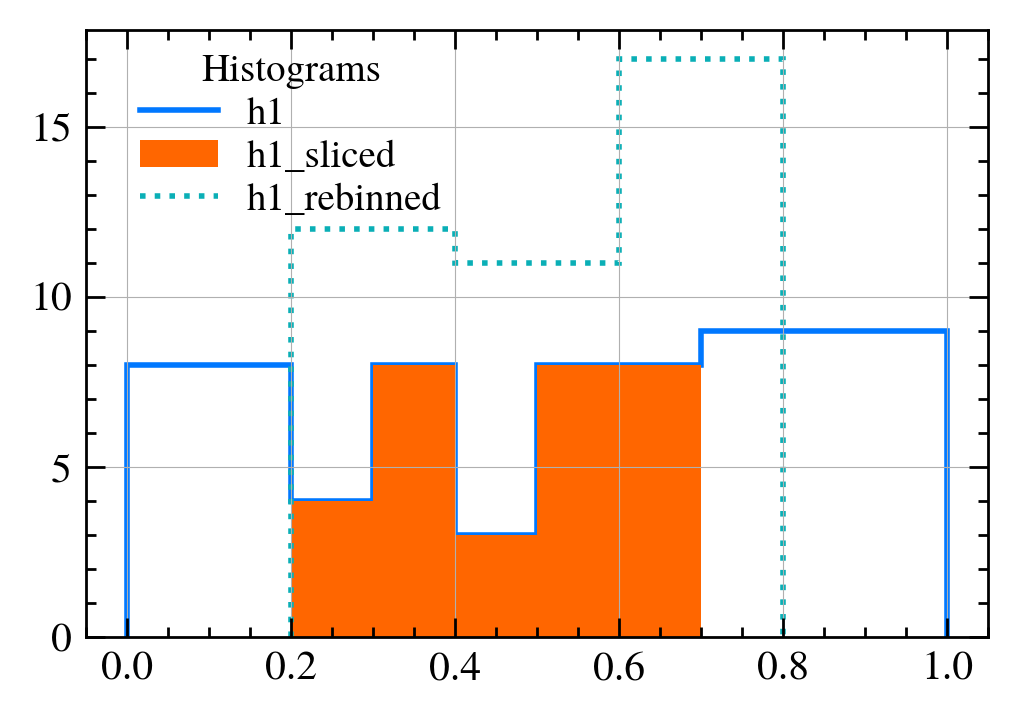

In [20]:
import matplotlib.pyplot as plt
import mplhep as hep

hep.style.use("LHCb2")

fig = plt.figure(figsize=(10,7))
plt.grid()

hep.histplot(h1, label="h1", yerr=False, linewidth=4)
hep.histplot(h1_sliced, yerr=False, label="h1_sliced", histtype="fill", linewidth=4, linestyle="--")
hep.histplot(h1_rebinned, yerr=False, label="h1_rebinned", linewidth=4, linestyle=":")

plt.legend(title="Histograms", loc="upper left", bbox_to_anchor=(0, 1.05))
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


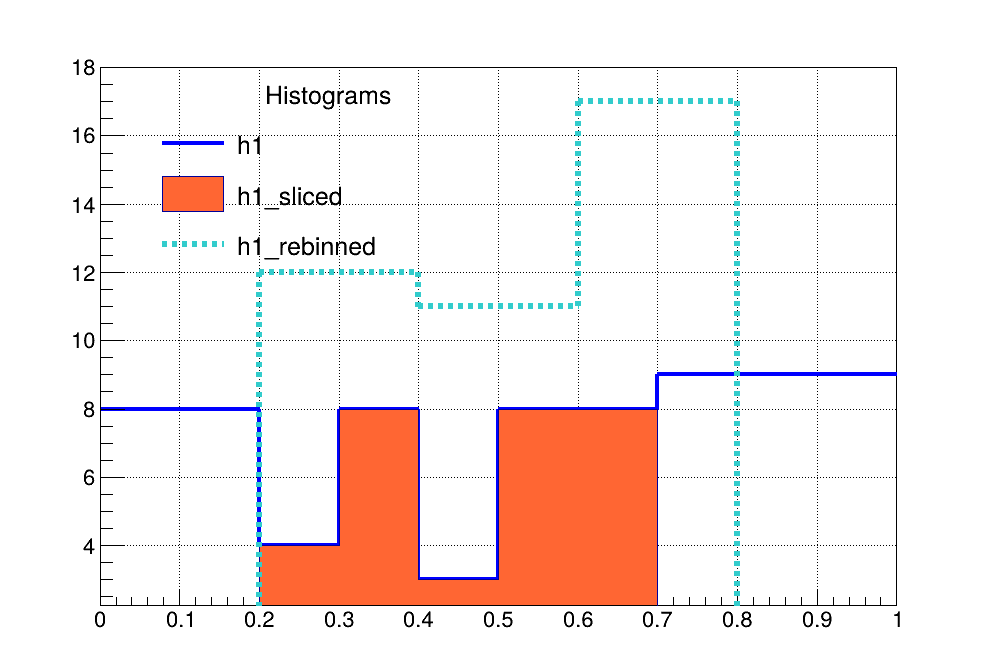

In [23]:
%jsroot off
c = ROOT.TCanvas("c", "c", 1000, 700)

c.SetGrid()

max_bin_value = max(h1.GetMaximum(), h1_sliced.GetMaximum(), h1_rebinned.GetMaximum())
h1.SetMaximum(18)
h1.SetStats(0)

h1.SetLineColor(ROOT.kBlue)
h1.SetLineWidth(4)
h1.Draw("HIST")
h1.SetTitle("")

h1_sliced.SetFillColor(ROOT.kOrange+8)
h1_sliced.Draw("HIST SAME") 

h1_rebinned.SetLineColor(ROOT.kCyan-3)
h1_rebinned.SetLineStyle(7)
h1_rebinned.SetLineWidth(6)
h1_rebinned.Draw("HIST SAME")

legend = ROOT.TLegend(0.15, 0.6, 0.5, 0.9)
legend.AddEntry(h1, "h1", "l")
legend.AddEntry(h1_sliced, "h1_sliced", "f")
legend.AddEntry(h1_rebinned, "h1_rebinned", "l")
legend.SetHeader("Histograms", "C") 
legend.SetFillStyle(0)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.Draw()

c.Draw()

In [22]:
from histoprint import print_hist

print_hist(h1, title="h1 Histogram")

                                 h1 Histogram                                  
  0.000 _                                                             4.5/row ╷
         ██████████████████████████████████████████████████████████████
  0.100 _██████████████████████████████████████████████████████████████
         ██████████████████████████████████████████████████████████████
  0.200 _██████████████████████████████████████████████████████████████
         ███████████████████████████████
  0.300 _███████████████████████████████
         ██████████████████████████████████████████████████████████████
  0.400 _██████████████████████████████████████████████████████████████
         ███████████████████████
  0.500 _███████████████████████
         ██████████████████████████████████████████████████████████████
  0.600 _██████████████████████████████████████████████████████████████
         ██████████████████████████████████████████████████████████████
  0.700 _███████████████████████████████████